In [6]:
#generic libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
df = pd.read_csv(r"D:\Work\python\Bangluru House Price\Bengaluru_House_Data.csv")
df


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [7]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df.groupby('area_type')['society'].count()

area_type
Built-up  Area          1215
Carpet  Area              54
Plot  Area               311
Super built-up  Area    6238
Name: society, dtype: int64

In [9]:
#assume that those variables are not important 
df2 = df.drop(['area_type','availability','society','balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
#delete rows with missing values as its percentage is too small compared to the total sample 13 k 
df3 =df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
#dealing with size COLUMN
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk']= df3['size'].apply(lambda x : int(x.split(' ')[0]))


C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_15580\4188648038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']= df3['size'].apply(lambda x : int(x.split(' ')[0]))


In [14]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
#dealing with total_sqft column
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
#functions to conevert all numbers to float
def convert_sqft_to_num(x):
    tokens =x.split('-')
    if len (tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
convert_sqft_to_num('123 - 125')

124.0

In [18]:
df3['total_sqft2']= df3['total_sqft'].apply(convert_sqft_to_num)

C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_15580\2088625699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft2']= df3['total_sqft'].apply(convert_sqft_to_num)


In [19]:
df3.head(50)

,location,size,total_sqft,bath,price,bhk,total_sqft2
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.00
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.00
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.00
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.00
5,Whitefield,2 BHK,1170,2.0,38.00,2,1170.00
6,Old Airport Road,4 BHK,2732,4.0,204.00,4,2732.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4,3300.00
8,Marathahalli,3 BHK,1310,3.0,63.25,3,1310.00
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6,1020.00


In [20]:
df3

,location,size,total_sqft,bath,price,bhk,total_sqft2
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5,3453.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4,4689.0


In [21]:
df3['total_sqft2'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location     13246 non-null  object 
 1   size         13246 non-null  object 
 2   total_sqft   13246 non-null  object 
 3   bath         13246 non-null  float64
 4   price        13246 non-null  float64
 5   bhk          13246 non-null  int64  
 6   total_sqft2  13200 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 827.9+ KB


In [23]:
df3['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13246, dtype: object

In [24]:
#price per sqft
df5=df3.copy()
df5['price_per_sqft']= df5['price']*100000/df5['total_sqft2']
df5.head()

,location,size,total_sqft,bath,price,bhk,total_sqft2,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.000000


In [25]:
#feature engineering 
len(df5['location'].unique())
df5.location = df5.location.apply(lambda x:x.strip())
len(df5['location'].unique())


1293

In [26]:
locationGroup=df5.groupby('location')['location'].count().sort_values(ascending =False)
locationGroup

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
locations_less_than_10 = (locationGroup[locationGroup <= 10]).count()
locations_less_than_10


1052

In [28]:
locations_less_than_10 = (locationGroup[locationGroup <= 10])
locations_less_than_10
df5['location']=df5.location.apply(lambda x :'other' if x in locations_less_than_10 else x)

In [29]:
len(df5['location'].unique())

242

In [30]:
#outlier removal
df6 =df5[~(df5.total_sqft2/df5.bhk<300)]
df6.shape
                                                

(12502, 8)

In [31]:
df.groupby('location')

In [32]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st= np.std (subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft> (m-st)) &(subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 8)

In [33]:
df6

,location,size,total_sqft,bath,price,bhk,total_sqft2,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5,3453.0,6689.834926
13316,other,4 BHK,3600,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4,4689.0,10407.336319


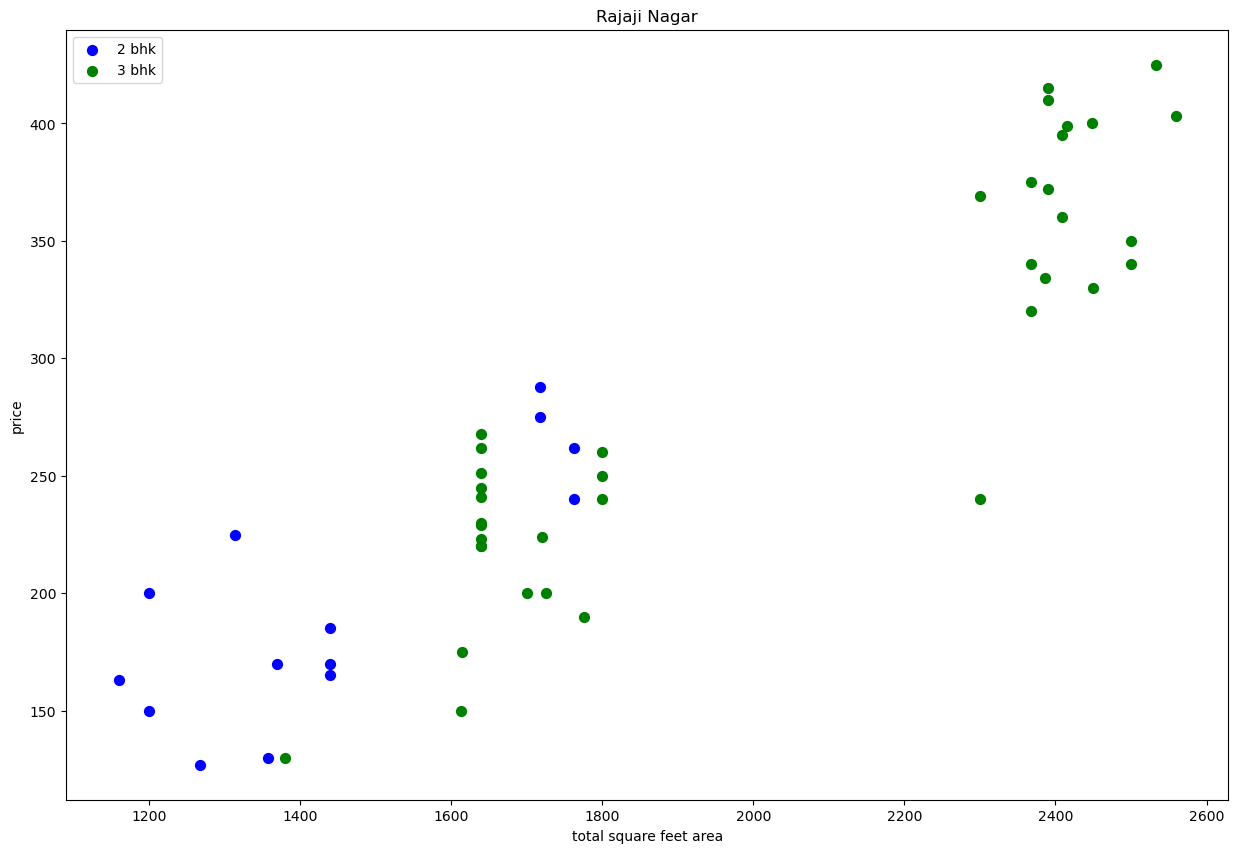

In [34]:
#comparing 2 and 3 bedrooms with price and total sqft

import matplotlib.pyplot as plt 

def scatterplotgraph (df, location):
    bhk2 = df[(df.location ==location ) & (df.bhk ==2)]
    bhk3 = df[(df.location == location) & (df.bhk ==3)]
    plt.rcParams['figure.figsize']= (15,10)
    plt.scatter(bhk2.total_sqft2,bhk2.price, color ='blue', label = '2 bhk', s=50)
    plt.scatter( bhk3.total_sqft2, bhk3.price, color ='green', label = '3 bhk', s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()

scatterplotgraph(df7, "Rajaji Nagar")

In [35]:
#remove those cases which is price of the 2 bedrooms with the same total sqare feet area with 3 bedrooms is higher than 3 bedrooms

def remove_bhk_outliers (df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):  #iterative in each location there 's a subset called location_df
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'): #iterative in each bhk there 's a subset called bhk_df
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),   # calcuale descriptive analysis for a group of eavh bhk, for example bhk =1 mean of those whose bhk =1 is >>>
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats= bhk_stats.get (bhk-1)
            if stats and stats['count']>5 :
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape


(7329, 8)

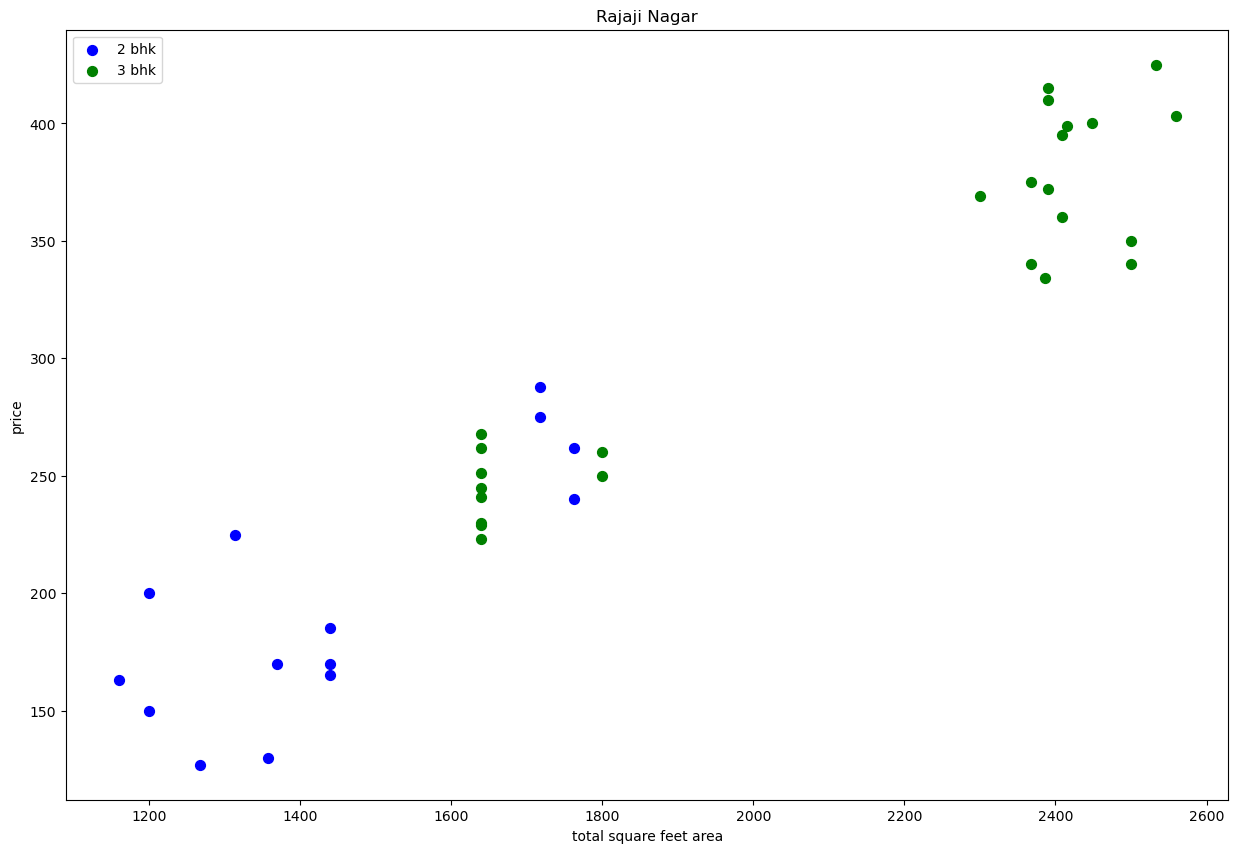

In [36]:
scatterplotgraph(df8, "Rajaji Nagar")

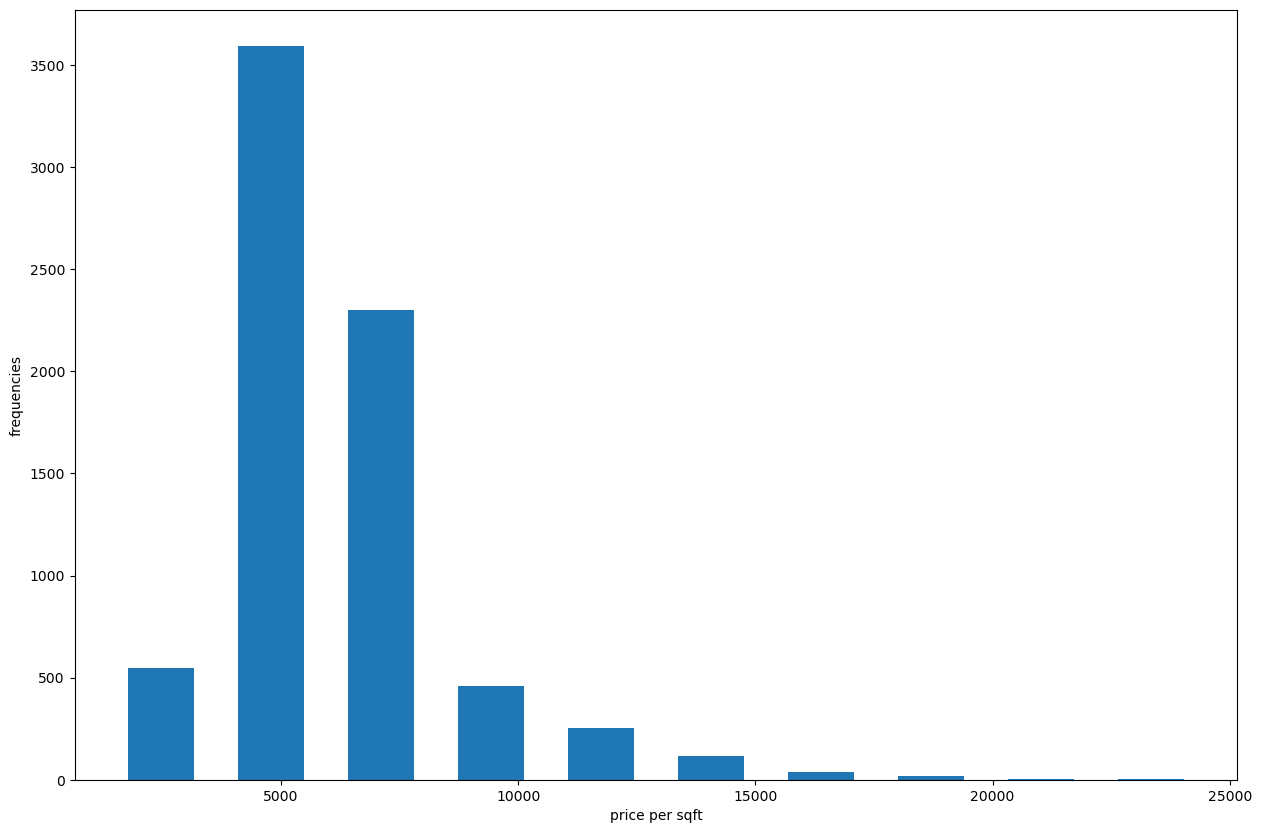

In [37]:
#draw histogram to know distribution of the data

def histogramgraph (df):
    plt.hist(df.price_per_sqft, rwidth =0.6)
    plt.xlabel("price per sqft")
    plt.ylabel ("frequencies")
    
histogramgraph(df8)


In [38]:
df8

,location,size,total_sqft,bath,price,bhk,total_sqft2,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630,3.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875,2.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200,2.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235,2.0,148.0,2,1235.0,11983.805668
...,...,...,...,...,...,...,...,...
10232,other,2 BHK,1200,2.0,70.0,2,1200.0,5833.333333
10233,other,1 BHK,1800,1.0,200.0,1,1800.0,11111.111111
10236,other,2 BHK,1353,2.0,110.0,2,1353.0,8130.081301
10237,other,1 Bedroom,812,1.0,26.0,1,812.0,3201.970443


In [39]:
# remove cases which bathrooms > bedrooms +2 (shold discuss with your manager )
df8[df8.bath > df8.bhk +2]

,location,size,total_sqft,bath,price,bhk,total_sqft2,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460,7.0,80.0,4,2460.0,3252.032520
5238,Nagasandra,4 Bedroom,7000,8.0,450.0,4,7000.0,6428.571429
6711,Thanisandra,3 BHK,1806,6.0,116.0,3,1806.0,6423.034330
8411,other,6 BHK,11338,9.0,1000.0,6,11338.0,8819.897689


In [40]:
df9 = df8[df8.bath < df8.bhk +2]
df9.shape

(7251, 8)

In [41]:
# remove unnessary variables
df10 = df9.drop(['size','price_per_sqft'],axis ='columns')
df10.head()

,location,total_sqft,bath,price,bhk,total_sqft2
0,1st Block Jayanagar,2850,4.0,428.0,4,2850.0
1,1st Block Jayanagar,1630,3.0,194.0,3,1630.0
2,1st Block Jayanagar,1875,2.0,235.0,3,1875.0
3,1st Block Jayanagar,1200,2.0,130.0,3,1200.0
4,1st Block Jayanagar,1235,2.0,148.0,2,1235.0


In [42]:
#preparing for model 
#model can't use with text data, so it should be converted to categorical with get_dummies from pandas 
dummies = pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10233,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [43]:
df11 =pd.concat([df10,dummies.drop('other',axis = "columns")],axis ="columns")
df11.head(3)

,location,total_sqft,bath,price,bhk,total_sqft2,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850,4.0,428.0,4,2850.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630,3.0,194.0,3,1630.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875,2.0,235.0,3,1875.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df12=df11.drop('location',axis="columns")
df12.head()

,total_sqft,bath,price,bhk,total_sqft2,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850,4.0,428.0,4,2850.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630,3.0,194.0,3,1630.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875,2.0,235.0,3,1875.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200,2.0,130.0,3,1200.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235,2.0,148.0,2,1235.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
df12=df12.drop('total_sqft',axis ="columns")
df12

,bath,price,bhk,total_sqft2,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,194.0,3,1630.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,235.0,3,1875.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2.0,130.0,3,1200.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,148.0,2,1235.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,2.0,70.0,2,1200.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10233,1.0,200.0,1,1800.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10236,2.0,110.0,2,1353.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10237,1.0,26.0,1,812.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
#identifying x and y
# price is independent variable
x= df12.drop('price', axis="columns")
y = df12.price
#split data to test and train
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest= train_test_split(x,y,test_size =0.2, random_state = 10)

#build linear regression model

from sklearn.linear_model import LinearRegression
L_clf = LinearRegression()
L_clf.fit(xtrain,ytrain)
L_clf.score(xtest,ytest)

#cross kfold validation
from sklearn.model_selection import ShuffleSplit #ShuffleSplit is designed to create random train/test splits of a dataset, which can be particularly useful for evaluating models on different subsets of data.
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits =5,test_size = 0.2, random_state =0)
cross_val_score (LinearRegression(),x,y,cv=cv) #if you don't specify type of cross validation in cv parameter, you can put number cv=5 and its defult was KFold validation







array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(x,y):
    algos={
        'linear regression': {
            'model': LinearRegression(), 'params':{}
        },
        'lasso': {
            'model': Lasso(), 'params':{'alpha':[1,2],'selection':['random','cyclic']}
        },
        'decision tree':{
            'model': DecisionTreeRegressor(), 'params':{'criterion':['mse','friedman_mse'], 'splitter':['best','random']}
        }
    }

    scores=[]
    cv = ShuffleSplit(n_splits =5,test_size = 0.2, random_state =0)
    for algo_name,config in algos.items(): #algo_name is a key of big dictionary but config is the value of big dictionary and since value is also dictionary so we call its values by : config['key of small dic']
        gs= GridSearchCV(config['model'],config['params'],cv=cv,return_train_score =False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns =['model','best_score','best_params'])
            
find_best_model_using_gridsearchcv(x,y)
        

C:\Users\nermeen.ashraf\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nermeen.ashraf\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nermeen.ashraf\AppData\Local\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\nermeen.ashraf\AppData\Local\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._

,model,best_score,best_params
0,linear regression,0.818354,{}
1,lasso,0.687434,"{'alpha': 1, 'selection': 'random'}"
2,decision tree,0.712388,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [70]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns == location)[0][0]
    X= np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index>=0:
        X[loc_index]=1
    X_df = pd.DataFrame([X], columns=x.columns)
    
    return L_clf.predict(X_df)[0]

In [72]:
predict_price('1st Phase JP Nagar',1000,3,3)

5071.415935859625

In [74]:
predict_price('Indira Nagar',1000,3,3)

5169.195043929782

In [ ]:
#export model to pickle file to use by flask 